In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import sidetable

In [ ]:
df_tamaño_empresa_mundial=pd.read_csv('../files/df_depurado.csv', index_col=0)
df_tamaño_empresa_mundial.head(2)

In [ ]:
df_tamaño_empresa_eu=pd.read_csv('../files/df_eu_depurado.csv', index_col=0)
df_tamaño_empresa_eu

In [ ]:
df_tamaño_empresa_eu['company_size_q21'].isnull().sum()
#averiguo los nulos

0

In [ ]:
df_tamaño_empresa_mundial['company_size_q21'].isnull().sum()

0

In [ ]:
df_tamaño_empresa_mundial.info()

In [ ]:
df_tamaño_empresa_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 15 to 25970
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                3164 non-null   object
 1   gender             3164 non-null   object
 2   country_q3         3164 non-null   object
 3   education_q4       3164 non-null   object
 4   role_q5            3164 non-null   object
 5   experience_q6      3164 non-null   object
 6   language_q7        3072 non-null   object
 7   sector_q20         3164 non-null   object
 8   company_size_q21   3164 non-null   object
 9   anual_income_q25   3009 non-null   object
 10  continent          3164 non-null   object
 11  gender_def         3164 non-null   object
 12  role_q5_def        1761 non-null   object
 13  annual_incom€_q25  3042 non-null   object
dtypes: object(14)
memory usage: 370.8+ KB


## `Todo el código a partir de aquí, va duplicado, siempre encabeza, mundial, seguido de Europa`

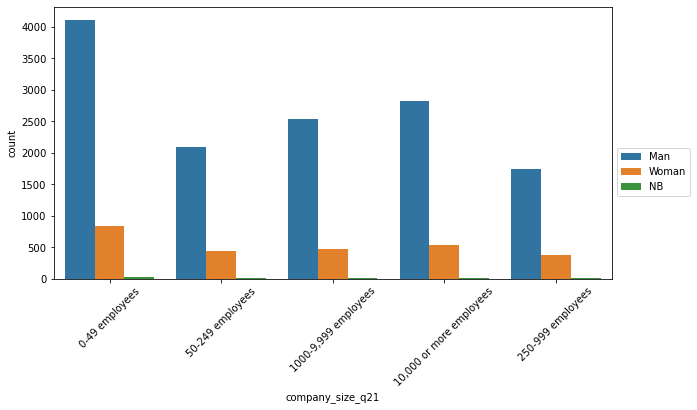

In [10]:

plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data =df_tamaño_empresa_mundial, x = "company_size_q21", hue = "gender_def", order=['0-49 employees','50-249 employees', '1000-9,999 employees','10,000 or more employees',  '250-999 employees']) # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.


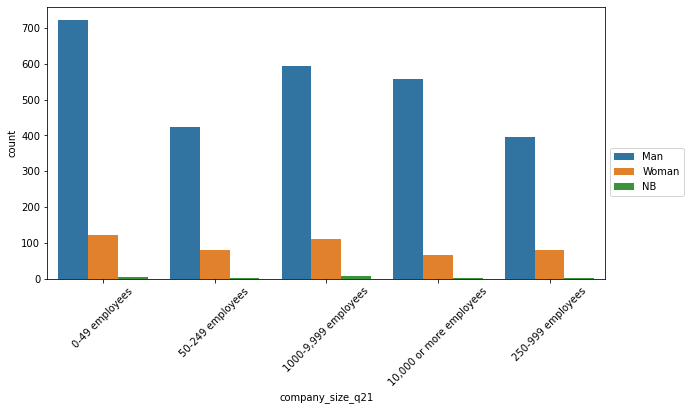

In [11]:

plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data =df_tamaño_empresa_eu, x = "company_size_q21", hue = "gender_def",order=['0-49 employees','50-249 employees', '1000-9,999 employees','10,000 or more employees',  '250-999 employees']) # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.

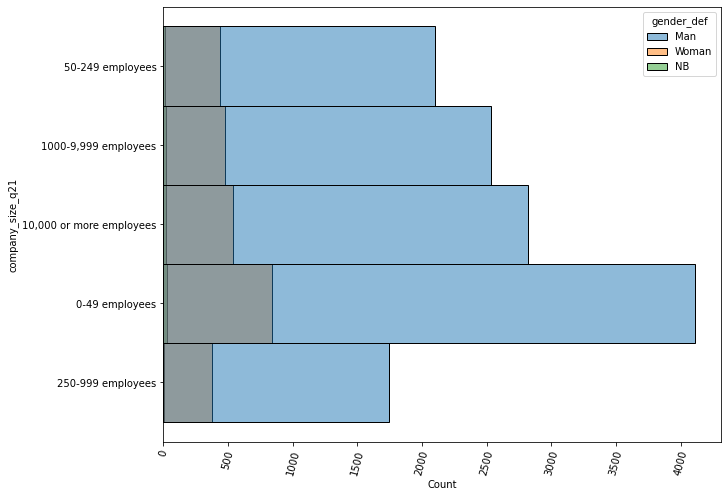

In [12]:
plt.figure(figsize =(10,8))
sns.histplot(y=df_tamaño_empresa_mundial['company_size_q21'],data = df_tamaño_empresa_mundial, hue='gender_def')
plt.xticks(rotation= 75)
plt.show()
#Representacion por tamaño de empresa de la cantidad de individuos según la identidad de género

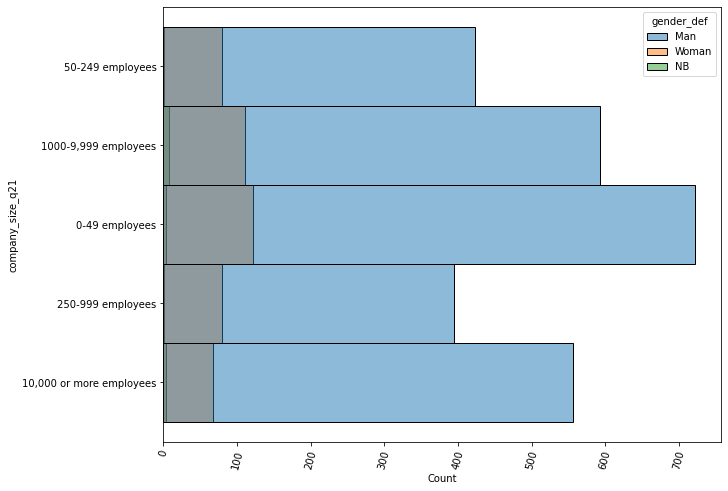

In [13]:
plt.figure(figsize =(10,8))
sns.histplot(y=df_tamaño_empresa_eu['company_size_q21'],data = df_tamaño_empresa_eu, hue='gender_def')
plt.xticks(rotation= 75)
plt.show()
#Representacion por tamaño de empresa de la cantidad de individuos según la identidad de género

In [14]:
genero_empresa_mundial=pd.DataFrame(df_tamaño_empresa_mundial.groupby(['company_size_q21'])['gender_def'].value_counts())
genero_empresa_mundial
#Agrupo los datos en un Dataframe en el que enfrento mis dos variables :género y temaño de empresa

gender_def
company_size_q21         gender_def            
0-49 employees           Man               4110
                         Woman              841
                         NB                  25
10,000 or more employees Man               2818
                         Woman              538
                         NB                  16
1000-9,999 employees     Man               2530
                         Woman              476
                         NB                  17
250-999 employees        Man               1742
                         Woman              377
                         NB                   7
50-249 employees         Man               2097
                         Woman              435
                         NB                   9

#### a nivel mundial, aparentemente, no hay diferencias en cuanto a géneros 

In [53]:
genero_empresa_eu=pd.DataFrame(df_tamaño_empresa_eu.groupby(['company_size_q21'])['gender_def'].value_counts())
genero_empresa_eu
#Agrupo los datos en un Dataframe en el que enfrento mis dos variables :género y temaño de empresa

gender_def
company_size_q21         gender_def            
0-49 employees           Man                722
                         Woman              122
                         NB                   4
10,000 or more employees Man                556
                         Woman               67
                         NB                   3
1000-9,999 employees     Man                593
                         Woman              111
                         NB                   8
250-999 employees        Man                395
                         Woman               79
                         NB                   1
50-249 employees         Man                423
                         Woman               79
                         NB                   1

#### en europa, se aprecia ligera variacion en cuanto al tamaño de la empresa, y la distribuión por géneros

In [16]:
genero_empresa_mundial.rename(columns={'gender_def':'frecuencia'}, inplace= True)
genero_empresa_mundial.reset_index()
#reordeno Dataframe

,company_size_q21,gender_def,frecuencia
0,0-49 employees,Man,4110
1,0-49 employees,Woman,841
2,0-49 employees,NB,25
3,"10,000 or more employees",Man,2818
4,"10,000 or more employees",Woman,538
5,"10,000 or more employees",NB,16
6,"1000-9,999 employees",Man,2530
7,"1000-9,999 employees",Woman,476
8,"1000-9,999 employees",NB,17
9,250-999 employees,Man,1742


In [17]:
genero_empresa_eu.rename(columns={'gender_def':'frecuencia'}, inplace= True)
genero_empresa_eu.reset_index()
#reordeno Dataframe

,company_size_q21,gender_def,frecuencia
0,0-49 employees,Man,722
1,0-49 employees,Woman,122
2,0-49 employees,NB,4
3,"10,000 or more employees",Man,556
4,"10,000 or more employees",Woman,67
5,"10,000 or more employees",NB,3
6,"1000-9,999 employees",Man,593
7,"1000-9,999 employees",Woman,111
8,"1000-9,999 employees",NB,8
9,250-999 employees,Man,395


In [21]:
tamaño_genero_ue=pd.DataFrame(pd.crosstab(df_tamaño_empresa_eu['company_size_q21'], df_tamaño_empresa_eu['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
tamaño_genero_ue.reset_index(inplace=True)
tamaño_genero_ue
#Hago tabla de frecuencias de las variables

gender_def,company_size_q21,Man,NB,Woman
0,0-49 employees,26.85,23.53,26.64
1,"10,000 or more employees",20.68,17.65,14.63
2,"1000-9,999 employees",22.05,47.06,24.24
3,250-999 employees,14.69,5.88,17.25
4,50-249 employees,15.73,5.88,17.25


<Figure size 432x288 with 0 Axes>

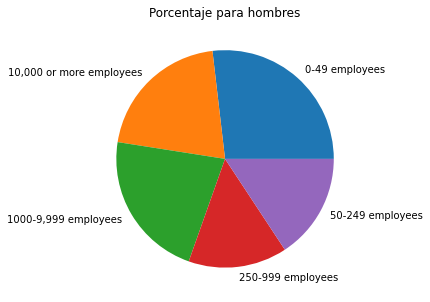

In [35]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_ue['Man'], labels=tamaño_genero_ue['company_size_q21'])
plt.title('Porcentaje para hombres')
plt.show();

<Figure size 432x288 with 0 Axes>

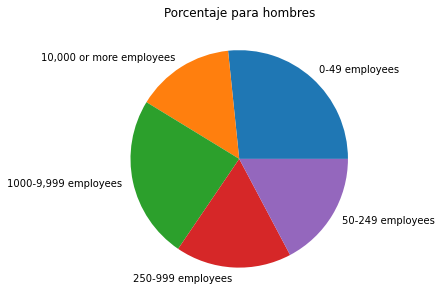

In [36]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_ue['Woman'], labels=tamaño_genero_ue['company_size_q21'])
plt.title('Porcentaje para hombres')
plt.show();

<Figure size 432x288 with 0 Axes>

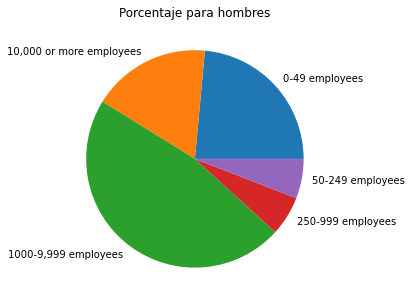

In [37]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_ue['NB'], labels=tamaño_genero_ue['company_size_q21'])
plt.title('Porcentaje para hombres')
plt.show();

In [38]:
tamaño_genero_mun=pd.DataFrame(pd.crosstab(df_tamaño_empresa_mundial['company_size_q21'], df_tamaño_empresa_mundial['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
tamaño_genero_mun.reset_index(inplace=True)
tamaño_genero_mun
#Hago tabla de frecuencias de las variables

gender_def,company_size_q21,Man,NB,Woman
0,0-49 employees,30.91,33.78,31.53
1,"10,000 or more employees",21.19,21.62,20.17
2,"1000-9,999 employees",19.03,22.97,17.85
3,250-999 employees,13.10,9.46,14.14
4,50-249 employees,15.77,12.16,16.31


<Figure size 432x288 with 0 Axes>

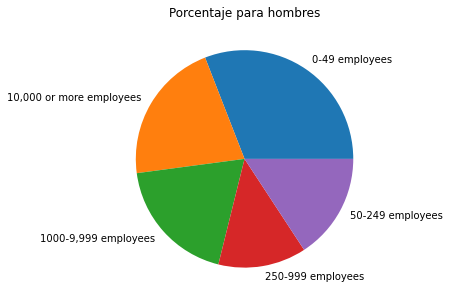

In [43]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_mun['Man'], labels=tamaño_genero_mun['company_size_q21'])
plt.title('Porcentaje para hombres')
plt.show();

<Figure size 432x288 with 0 Axes>

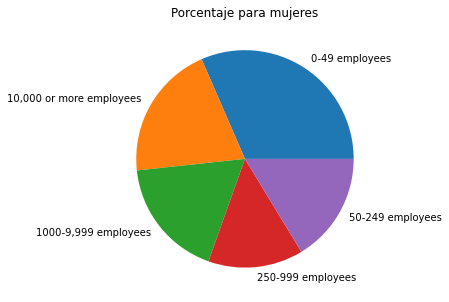

In [44]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_mun['Woman'], labels=tamaño_genero_mun['company_size_q21'])
plt.title('Porcentaje para mujeres')
plt.show();

<Figure size 432x288 with 0 Axes>

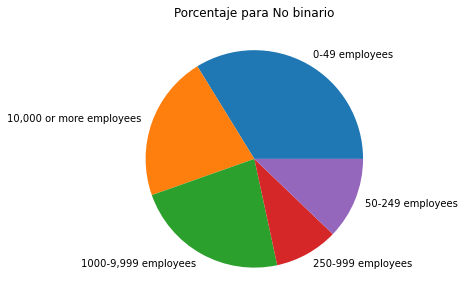

In [45]:
plt.figure()
plt.figure(figsize=(10,5))
desfase=(0.1,0.1,0.1)
colores =("#EE6055","#60D394","#AAF683")
figure=plt.pie(tamaño_genero_mun['NB'], labels=tamaño_genero_mun['company_size_q21'])
plt.title('Porcentaje para No binario')
plt.show();

La distribución por géneros, es bastante similar, se concentran en pequeña empresa y las empresas más grandes.
La única diferencia más sustancial , la observamos en los encuestados no binarios, que en mediana empresa a penas están presentes (aún no sabemos si es una diferencia significativa)

En el estudio realizado con los encuestados que prefieren no definirse, hemos restado 355 registros que se han valorado como nulos según referencias, vemos que esta población, sigue una distribución similar a la binaria.

In [46]:
from scipy.stats import chi2_contingency

In [51]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(genero_empresa_mundial)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas en el tipo de puesto según el género, con una p de 1.0


In [50]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(genero_empresa_eu)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de puesto según el género, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas en el tipo de puesto según el género, con una p de 1.0
